In [8]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [9]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax




def parse_list():
    f = open("test_log.txt", "r")
    val = []
    for _ in range(2):
        p = f.readline()
        p = p[1:-2].split(", ")
        for i in range(len(p)):
            p[i] = int(p[i])
        val.append(p)
    
    return val[0], val[1]


3103
['setosa' 'versicolor' 'virginica']
Confusion matrix, without normalization
[[1891 1212]
 [1009 1839]]
Normalized confusion matrix
[[0.61 0.39]
 [0.35 0.65]]


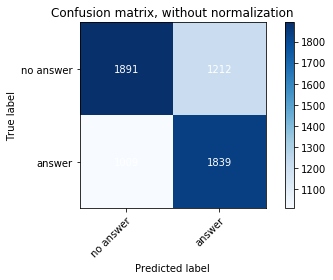

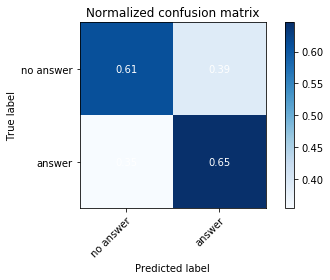

In [10]:
pred, label = parse_list()
count = 0
for i in label:
    if i == 0:
        count += 1
print(count)

iris = datasets.load_iris()
print(iris.target_names)
iris.target_names[0] = "no answer"
iris.target_names[1] = "answer"
class_names = iris.target_names

confusion_matrix(label, pred)
# class_names = ['1','2']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(label, pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(label, pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [4]:
iris.target_names

array(['no answer', 'answer', 'virginica'], dtype='<U10')